In [2]:
import pandas as pd
import sys
import numpy as np

import scanpy as sc
import scanpy.external as sce

import seaborn as sns

In [29]:
%matplotlib inline

In [4]:
sys.path.append("../../../datasets/") # script to read in data

from geo_read import geoREAD

In [5]:
geo = geoREAD('GSE118828_RAW.tar','../../../datasets/')

In [6]:
geo.gsm_files

['GSM3348303_553_Perit_S1.counts.umiCounts.aboveBackground.table.csv.gz',
 'GSM3348304_565_Cystadenoma_S1.counts.umiCounts.aboveBackground.table.csv.gz',
 'GSM3348305_589_Omentum_S1.counts.umiCounts.aboveBackground.table.csv.gz',
 'GSM3348306_618_Ovary_S1.counts.umiCounts.table.csv.gz',
 'GSM3348307_TB10040568_NORMAL_S1.counts.umiCounts.table.csv.gz',
 'GSM3348308_TB10040568_TUMOR_S1.counts.umiCounts.table.csv.gz',
 'GSM3348309_TB10040580_S1.counts.umiCounts.table.csv.gz',
 'GSM3348310_TB10040580met_S1_1_.counts.umiCounts.table.csv.gz',
 'GSM3348311_TB10040589_4_S1.counts.umiCounts.table.csv.gz',
 'GSM3348312_TB10040589met_S1.counts.umiCounts.table.csv.gz',
 'GSM3348313_TB10040600_CD31_S1.counts.umiCounts.table.csv.gz',
 'GSM3348314_TB10040600_NP-1_S1.counts.umiCounts.table.csv.gz',
 'GSM3348315_TB10040600_NP-2_S1.counts.umiCounts.table.csv.gz',
 'GSM3348316_TB10040600_Tumor_S1.counts.umiCounts.table.csv.gz',
 'GSM3348317_TB10040626_OMENTUM_S1.counts.umiCounts.table.csv.gz',
 'GSM33483

In [102]:
data_dict = {}
for i, d in enumerate(geo.gsm_files):
    
    data = geo.readGSM(d)
    
    data_dict[str(i)] = data

In [103]:
data_dict["1"]

,CellId,DDX11L1,WASH7P,MIR6859-3,MIR6859-2,MIR6859-4,MIR6859-1,MIR1302-11,MIR1302-9,MIR1302-2,...,DAZ1,DAZ3,DAZ2,TTTY3B,TTTY3,CDY1B,CDY1,CSPG4P1Y,GOLGA2P3Y,GOLGA2P2Y
0,cgagcagagtgacagact,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,agtaaaggattgccacgc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,caaccgatagcgtgaatt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,acccaactcaatgtggtg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,gagtgaccgatgtctagc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,ggacgaggacgagccgtt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,tgttcgtagaggcaccac,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,tttgggagcacgtagagg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,agtctggatcaagtcggc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
for d in data_dict:
    
    data_dict[d].set_index("CellId", inplace=True)
    
    data_dict[d].index = data_dict[d].index + "-" + d

In [105]:
data_dict["2"].head()

,DDX11L1,WASH7P,MIR6859-3,MIR6859-2,MIR6859-4,MIR6859-1,MIR1302-11,MIR1302-9,MIR1302-2,MIR1302-10,...,DAZ1,DAZ3,DAZ2,TTTY3B,TTTY3,CDY1B,CDY1,CSPG4P1Y,GOLGA2P3Y,GOLGA2P2Y
CellId,,,,,,,,,,,,,,,,,,,,,
aagccacttacgcgagca-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acccaataagctcgttat-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agatgtctaggtgaggcc-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agcacggtggtggcgaat-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agtaaacgttattcggga-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df4_5 = pd.concat([data_dict["4"], data_dict["5"]], axis=0, join="outer")

df4_5.shape

(551, 26364)

In [124]:
data = df4_5.copy(deep=True)

adata = sc.AnnData(
        X=np.array(data),
        obs={'obs_names': data.index.astype(str)},
        var={'var_names': data.columns.values}
    )

In [125]:
adata

AnnData object with n_obs × n_vars = 551 × 26364 

In [126]:
patient_lst= [cell[-1] for cell in data.index.astype(str)]

len(patient_lst)

551

In [127]:
adata.obs["Patient"] = patient_lst

adata

AnnData object with n_obs × n_vars = 551 × 26364 
    obs: 'Patient'

In [129]:
# Molecules and reads
adata.obs["total_molecules"] = np.sum(adata.X, axis=1)

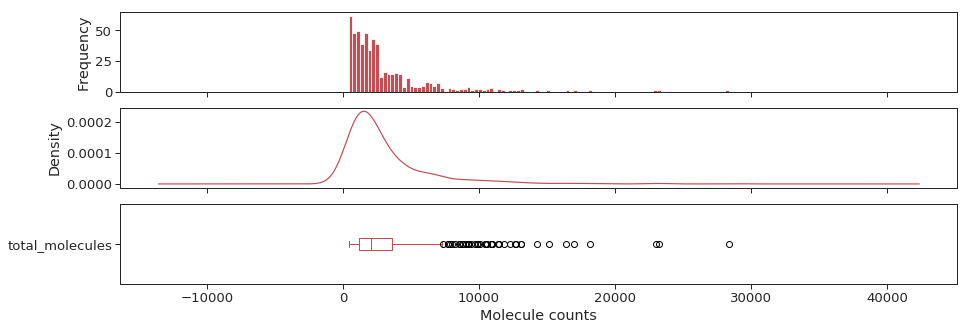

In [130]:
a = adata.copy()

# Per cell (Total molecules per cell)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,5))

a.obs["total_molecules"][a.obs["total_molecules"] != 0].plot(kind="hist", bins=100, ax=ax1, color="r")
a.obs["total_molecules"][a.obs["total_molecules"] != 0].plot(kind="kde", ax=ax2, color="r")
a.obs["total_molecules"][a.obs["total_molecules"] != 0].plot(kind="box", vert=False, ax=ax3, color="r")

x = ax3.set_xlabel("Molecule counts")

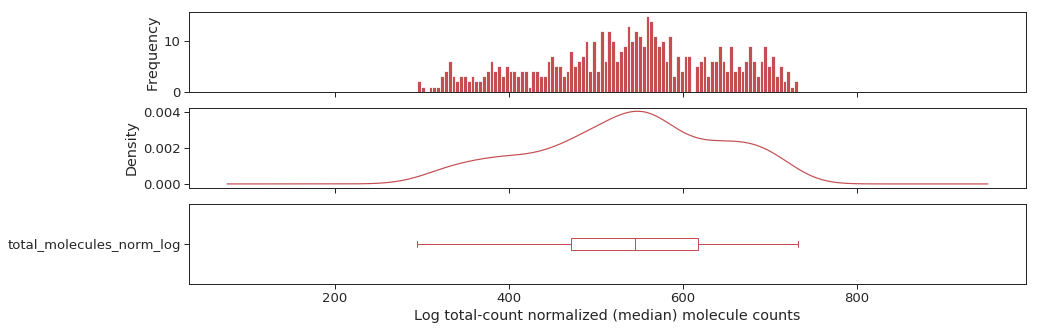

In [132]:
# Total count normalize to the median library size per sample
sc.pp.normalize_total(adata,
                                   target_sum=None,
                                   key_added="total_molecules",
                                   inplace=True)

# Logarithmize molecule counts
sc.pp.log1p(adata)

adata.obs["total_molecules_norm_log"] = np.sum(adata.X, axis=1)

a = adata
# Plot normalized and logaritmized counts
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,5))

a.obs["total_molecules_norm_log"][a.obs["total_molecules_norm_log"] != 0].plot(kind="hist", bins=100, ax=ax1, color="r")
a.obs["total_molecules_norm_log"][a.obs["total_molecules_norm_log"] != 0].plot(kind="kde", ax=ax2, color="r")
a.obs["total_molecules_norm_log"][a.obs["total_molecules_norm_log"] != 0].plot(kind="box", vert=False, ax=ax3, color="r")

x = ax3.set_xlabel("Log total-count normalized (median) molecule counts")

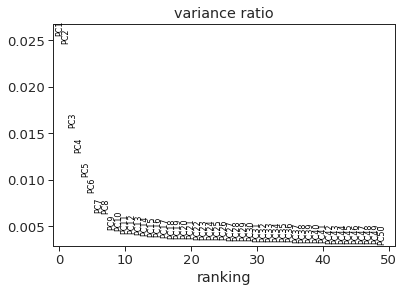

In [134]:
# Principal components
#rcParams['figure.figsize'] = (5, 5)

sc.tl.pca(adata, svd_solver='arpack')

sc.pl.pca_variance_ratio(adata, n_pcs=50, log=False, show=True)

In [135]:
# Computing the neighborhood graph
sc.pp.neighbors(
    adata,
    n_neighbors=15, # default
    n_pcs=50, # Let's use 50 PCs
    method="umap" # default
)

In [136]:
# Embedding the neighborhood graph
sc.tl.umap(adata)

In [143]:
adata.obs["Patient"] = adata.obs["Patient"].replace(["4","5"], ["Normal","Tumor"])

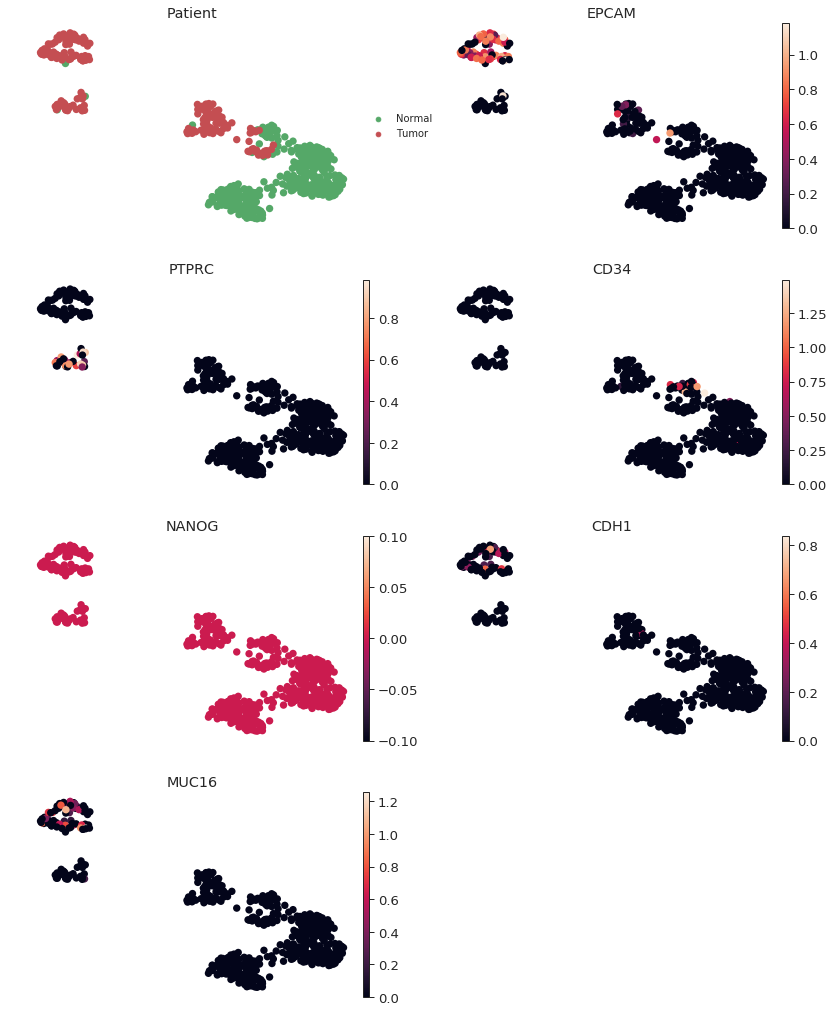

In [160]:
# Batches
#rcParams['figure.figsize'] = (5, 5)

sc.pl.umap(adata,
           color=["Patient", "EPCAM", "PTPRC", "CD34", "NANOG", "CDH1", "MUC16"],
           use_raw=False, # Not relevant here
           ncols=2, 
           sort_order=False,
           palette=["g","r"],
           frameon=False,
           legend_fontsize = 10
)

In [151]:
CD34_DF = pd.DataFrame({
    "index": adata.obs.index,
    "CD34": adata[:, "CD34"].X
})

CD34_DF.head()

,index,CD34
0,gcgcgggtcggctgcggt-4,0.0
1,aattgggaggcccgagca-4,0.0
2,cggcgtcgagcagccaga-4,0.0
3,agcacgggccattcggga-4,0.0
4,tcgcctcgagcacaccac-4,0.0


In [156]:
CD34_DF.sort_values(by="CD34", ascending=False)

,index,CD34
249,cgagcagccagattcgca-4,1.493865
226,gccgttgaaggggagctt-4,1.270423
308,ggccataacgtgacggac-4,1.187486
252,tatttccggcgtaaagaa-4,0.861557
518,agatgtcttacggggatc-5,0.822511
...,...,...
180,ttggatggccatatccgg-4,0.000000
179,tagagggcttgtgtccta-4,0.000000
178,acggacatccggtgcggt-4,0.000000
177,ctgtggtaatagtggcag-4,0.000000


In [23]:
sys.path.append("../packages/Palantir/src/")

import palantir

In [24]:
d = sce.tl.palantir(adata, normalize=True, log_transform=True, filter_low=False, inplace=True)


Determing nearest neighbor graph...


In [25]:
adata

AnnData object with n_obs × n_vars = 551 × 26364 
    obs: 'Patient'
    uns: 'palantir_norm_data', 'palantir_pca_results', 'palantir_diff_maps', 'palantir_ms_data', 'palantir_tsne', 'palantir_imp_df'

In [27]:
adata.uns["palantir_tsne"].head()

,x,y
CellId,,
gcgcgggtcggctgcggt-4,-5.549911,0.323915
aattgggaggcccgagca-4,-5.593726,0.443829
cggcgtcgagcagccaga-4,-4.963106,1.070318
agcacgggccattcggga-4,-5.867429,0.249472
tcgcctcgagcacaccac-4,-0.660807,4.018179


In [40]:
c = list(adata.obs["Patient"].replace(["4","5"], ["r","g"]).values)

In [41]:
len(c)

551

In [42]:
c[:4]

['r', 'r', 'r', 'r']

In [44]:
adata.uns["palantir_tsne"]

,x,y
CellId,,
gcgcgggtcggctgcggt-4,-5.549911,0.323915
aattgggaggcccgagca-4,-5.593726,0.443829
cggcgtcgagcagccaga-4,-4.963106,1.070318
agcacgggccattcggga-4,-5.867429,0.249472
tcgcctcgagcacaccac-4,-0.660807,4.018179
...,...,...
gatcaagcttgtcgttat-5,-0.001955,-2.629712
ggattggatcaagagtga-5,3.664898,-6.422519
cactgttgcggtaattgg-5,-1.257036,2.794934


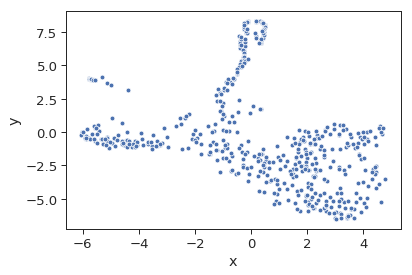

In [52]:
ax = sns.scatterplot(data=adata.uns["palantir_tsne"], x="x", y="y")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


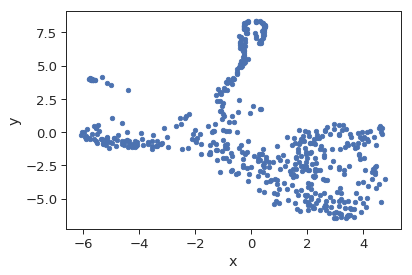

In [65]:
adata.uns["palantir_tsne"].plot(kind="scatter", x="x", y="y")

In [ ]:
adata2_r2 = adata1_sub[~adata2_r1.obs["phenos"].isin(Remove_phenos)][:, adata2_r1.var.index]


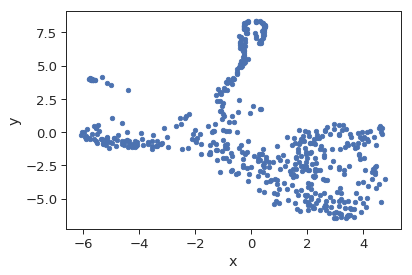

In [82]:
adata[adata.obs["Patient"]=="4"].uns["palantir_tsne"].plot(kind="scatter", x="x", y="y", c="b")

In [84]:
adata[adata.obs["Patient"]=="4"]#.uns["palantir_tsne"]

View of AnnData object with n_obs × n_vars = 355 × 26364 
    obs: 'Patient'
    uns: 'palantir_norm_data', 'palantir_pca_results', 'palantir_diff_maps', 'palantir_ms_data', 'palantir_tsne', 'palantir_imp_df'

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


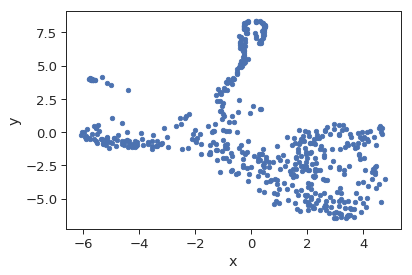

In [69]:
adata[adata.obs["Patient"]=="4"].uns["palantir_tsne"].plot(kind="scatter", x="x", y="y")

In [29]:
adata.uns["palantir_diff_maps"]

{'T': <551x551 sparse matrix of type '<class 'numpy.float64'>'
 	with 29230 stored elements in Compressed Sparse Row format>,
 'EigenVectors':                              0         1         2         3         4  \
 CellId                                                                   
 gcgcgggtcggctgcggt-4 -0.042601  0.003058 -0.004342 -0.114963  0.045973   
 aattgggaggcccgagca-4 -0.042601  0.005479 -0.004056 -0.128867  0.038059   
 cggcgtcgagcagccaga-4 -0.042601 -0.001973  0.005965 -0.097632  0.027994   
 agcacgggccattcggga-4 -0.042601  0.014581 -0.005301 -0.169646  0.072457   
 tcgcctcgagcacaccac-4 -0.042601 -0.011718 -0.007346 -0.000942  0.004073   
 ...                        ...       ...       ...       ...       ...   
 gatcaagcttgtcgttat-5 -0.042601  0.020454 -0.007283  0.010019 -0.003505   
 ggattggatcaagagtga-5 -0.042601  0.023961 -0.014088  0.052326 -0.007474   
 cactgttgcggtaattgg-5 -0.042601  0.001698  0.021365 -0.028908 -0.045563   
 tctagcgatcaacactgt-5 -0.042601  

In [28]:
ax = sns.scatterplot(data=adata.uns["palantir_diff_maps"], x="x", y="y")

ValueError: Could not interpret input 'x'

In [86]:
adata

AnnData object with n_obs × n_vars = 551 × 26364 
    obs: 'Patient'
    uns: 'palantir_norm_data', 'palantir_pca_results', 'palantir_diff_maps', 'palantir_ms_data', 'palantir_tsne', 'palantir_imp_df'

In [96]:
adata.uns["palantir_imp_df"]

,DDX11L1,WASH7P,MIR6859-3,MIR6859-2,MIR6859-4,MIR6859-1,MIR1302-11,MIR1302-9,MIR1302-2,MIR1302-10,...,DAZ1,DAZ3,DAZ2,TTTY3B,TTTY3,CDY1B,CDY1,CSPG4P1Y,GOLGA2P3Y,GOLGA2P2Y
CellId,,,,,,,,,,,,,,,,,,,,,
gcgcgggtcggctgcggt-4,-3.321928,-3.272062,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928
aattgggaggcccgagca-4,-3.321928,-3.287180,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928
cggcgtcgagcagccaga-4,-3.321928,-3.292824,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928
agcacgggccattcggga-4,-3.321928,-3.274220,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928
tcgcctcgagcacaccac-4,-3.321928,-3.301245,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gatcaagcttgtcgttat-5,-3.321928,-3.297772,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928
ggattggatcaagagtga-5,-3.321928,-3.307458,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928
cactgttgcggtaattgg-5,-3.321928,-3.302131,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928


In [89]:
palantir

<module 'palantir' from '../packages/Palantir/src/palantir/__init__.py'>

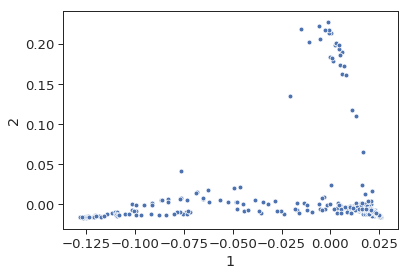

In [94]:
ax = sns.scatterplot(data=adata.uns["palantir_diff_maps"]["EigenVectors"], x=1, y=2)

### out of scanpy

In [97]:

import palantir

# Plotting and miscellaneous imports
import os
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [98]:
data.head()

,DDX11L1,WASH7P,MIR6859-3,MIR6859-2,MIR6859-4,MIR6859-1,MIR1302-11,MIR1302-9,MIR1302-2,MIR1302-10,...,DAZ1,DAZ3,DAZ2,TTTY3B,TTTY3,CDY1B,CDY1,CSPG4P1Y,GOLGA2P3Y,GOLGA2P2Y
CellId,,,,,,,,,,,,,,,,,,,,,
gcgcgggtcggctgcggt-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aattgggaggcccgagca-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cggcgtcgagcagccaga-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agcacgggccattcggga-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tcgcctcgagcacaccac-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
counts = df4_5.copy(deep=True)

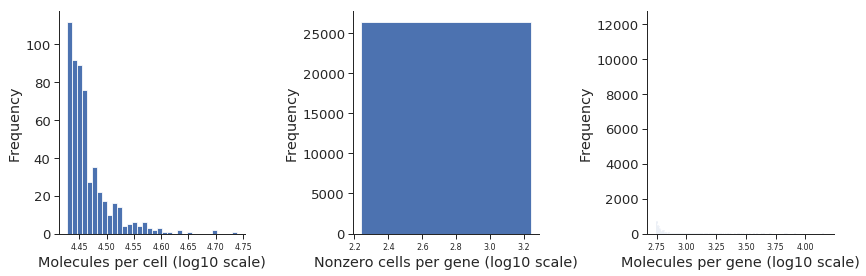

In [110]:
fig, ax = palantir.plot.plot_molecules_per_cell_and_gene(counts+1)


In [111]:
filtered_counts = palantir.preprocess.filter_counts_data(counts, cell_min_molecules=1000, genes_min_cells=10)

In [112]:
filtered_counts.shape

(438, 11512)

In [113]:
norm_df = palantir.preprocess.normalize_counts(counts)


In [114]:
norm_df = palantir.preprocess.log_transform(norm_df)


In [115]:
pca_projections, _ = palantir.utils.run_pca(norm_df)


In [117]:
# Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)


Determing nearest neighbor graph...


In [118]:
ms_data = palantir.utils.determine_multiscale_space(dm_res)


In [119]:
tsne = palantir.utils.run_tsne(ms_data)


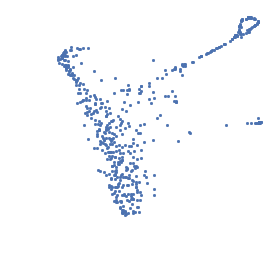

In [120]:
fig, ax = palantir.plot.plot_tsne(tsne)


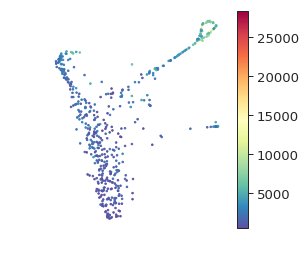

In [121]:
fig, ax = palantir.plot.plot_tsne_by_cell_sizes(counts, tsne)


In [122]:
imp_df = palantir.utils.run_magic_imputation(norm_df, dm_res)


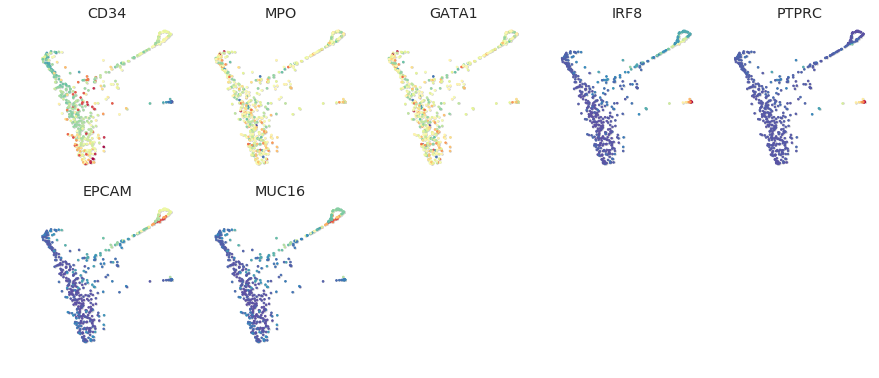

In [146]:
palantir.plot.plot_gene_expression(imp_df, tsne, ['CD34', 'MPO', 'GATA1', 'IRF8', "PTPRC", "EPCAM", "MUC16"])


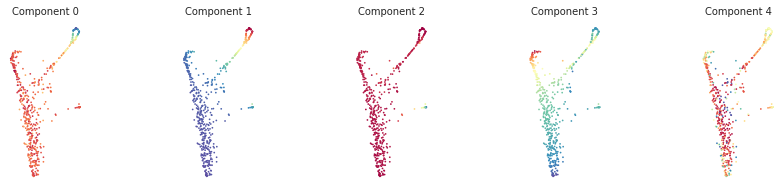

In [147]:
palantir.plot.plot_diffusion_components(tsne, dm_res)


In [157]:
start_cell = 'cgagcagccagattcgca-4'
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=500)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0006822466850280762 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.0831890861193339 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


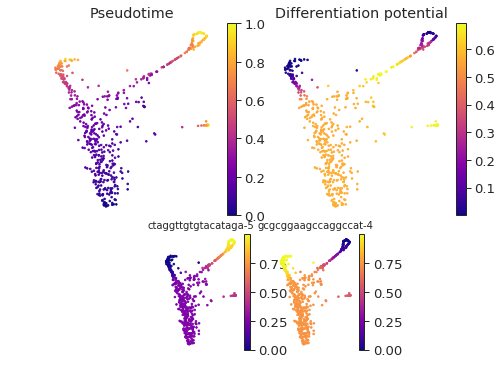

In [158]:
palantir.plot.plot_palantir_results(pr_res, tsne)
